In [55]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer




In [56]:
df=pd.read_csv("D:\karima\GDG data science\Telecom\Telecom Customers Churn.csv")

In [57]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [58]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64


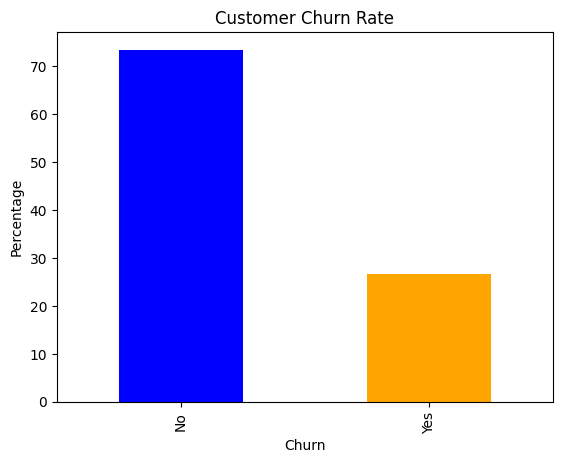

In [60]:
churn_rate = df['Churn'].value_counts(normalize=True) * 100
print(churn_rate)


churn_rate.plot(kind='bar', color=['blue', 'orange'], title="Customer Churn Rate")
plt.ylabel("Percentage")
plt.xlabel("Churn")
plt.show()

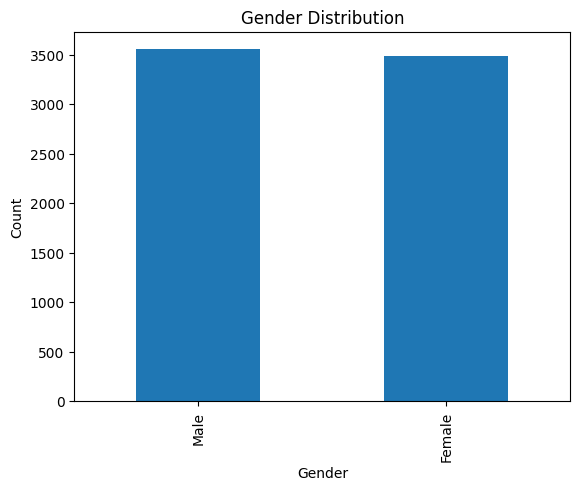

In [61]:
df['gender'].value_counts().plot(kind='bar', title="Gender Distribution")
plt.ylabel("Count")
plt.xlabel("Gender")
plt.show()

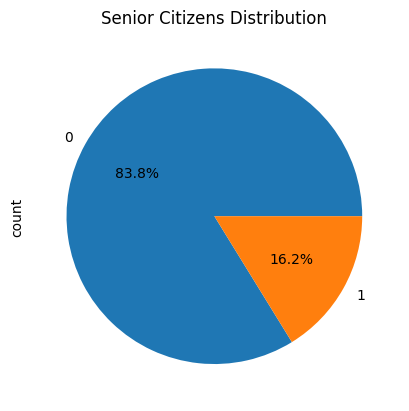

In [62]:
df['SeniorCitizen'].value_counts().plot(kind='pie', autopct='%1.1f%%', title="Senior Citizens Distribution")
plt.show()

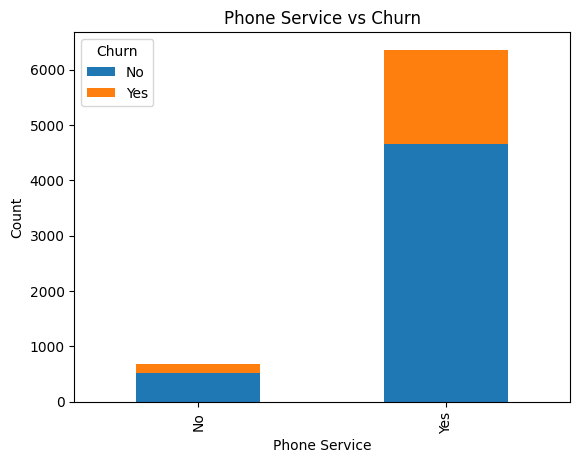

In [63]:
pd.crosstab(df['PhoneService'], df['Churn']).plot(kind='bar', stacked=True)
plt.title("Phone Service vs Churn")
plt.ylabel("Count")
plt.xlabel("Phone Service")
plt.show()

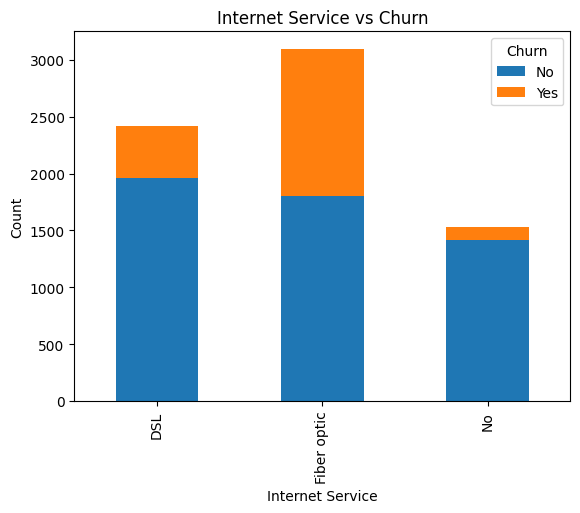

In [64]:
pd.crosstab(df['InternetService'], df['Churn']).plot(kind='bar', stacked=True)
plt.title("Internet Service vs Churn")
plt.ylabel("Count")
plt.xlabel("Internet Service")
plt.show()

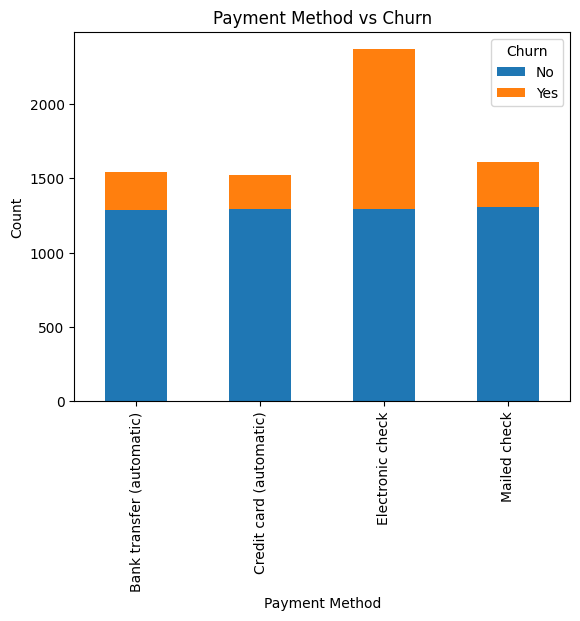

In [65]:
pd.crosstab(df['PaymentMethod'], df['Churn']).plot(kind='bar', stacked=True)
plt.title("Payment Method vs Churn")
plt.ylabel("Count")
plt.xlabel("Payment Method")
plt.show()

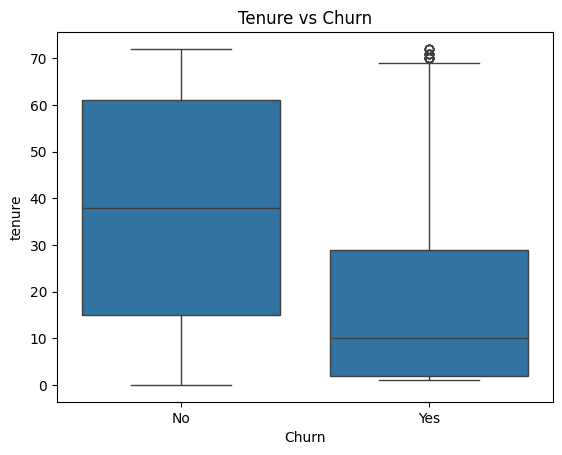

In [66]:
sns.boxplot(x='Churn', y='tenure', data=df)
plt.title("Tenure vs Churn")
plt.show()

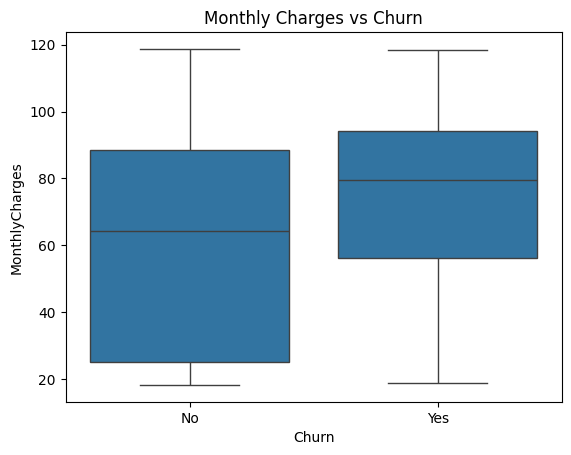

In [67]:
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title("Monthly Charges vs Churn")
plt.show()

                  customerID    gender  SeniorCitizen   Partner  Dependents  \
customerID          1.000000  0.006288      -0.002074 -0.026729   -0.012823   
gender              0.006288  1.000000      -0.001874 -0.001808    0.010517   
SeniorCitizen      -0.002074 -0.001874       1.000000  0.016479   -0.211185   
Partner            -0.026729 -0.001808       0.016479  1.000000    0.452676   
Dependents         -0.012823  0.010517      -0.211185  0.452676    1.000000   
tenure              0.008035  0.005106       0.016567  0.379697    0.159712   
PhoneService       -0.006483 -0.006488       0.008576  0.017706   -0.001762   
MultipleLines       0.004316 -0.006739       0.146185  0.142410   -0.024991   
InternetService    -0.012407 -0.000863      -0.032310  0.000891    0.044590   
OnlineSecurity      0.013292 -0.015017      -0.128221  0.150828    0.152166   
OnlineBackup       -0.003334 -0.012057      -0.013632  0.153130    0.091015   
DeviceProtection   -0.006918  0.000549      -0.02139

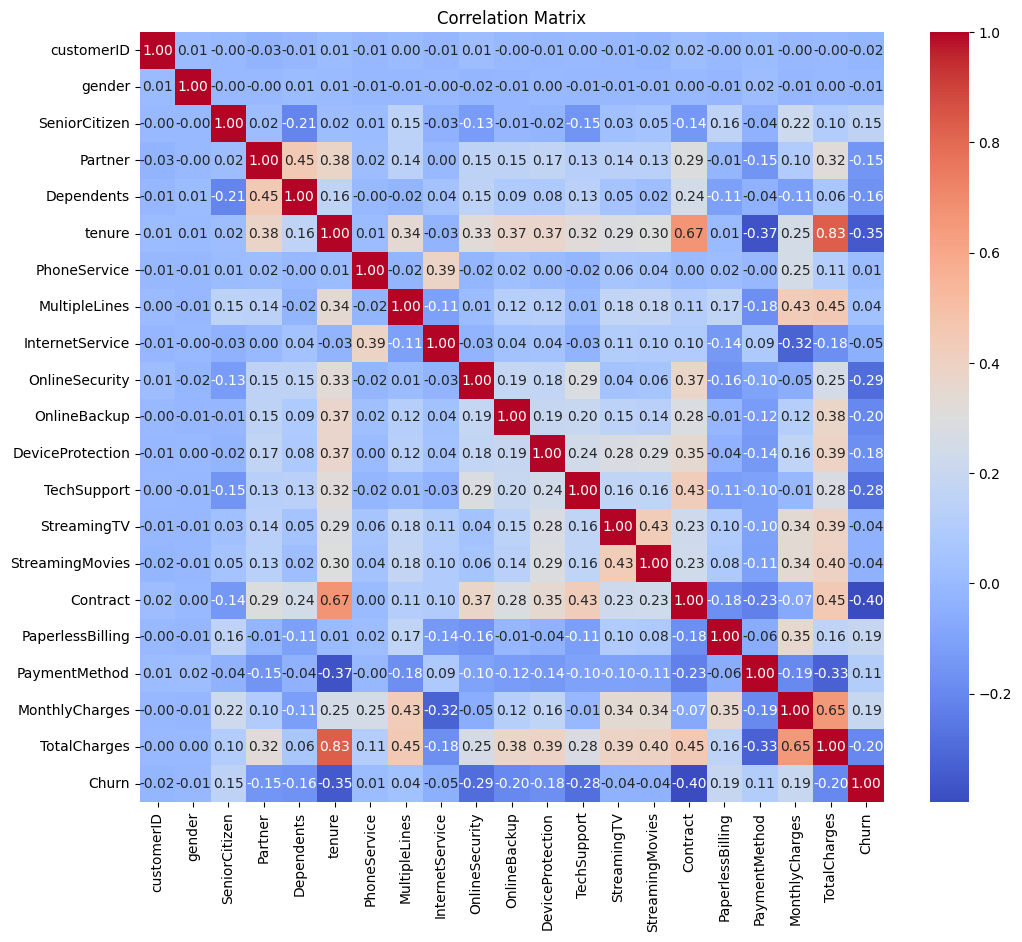

In [68]:

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df_encoded = df.copy()
categorical_columns = df_encoded.select_dtypes(include=['object']).columns
label_encoder = LabelEncoder()
for column in categorical_columns:
    df_encoded[column] = label_encoder.fit_transform(df_encoded[column])

correlation_matrix = df_encoded.corr()

print(correlation_matrix)

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [69]:

label_encoder = LabelEncoder()
df_encoded['Contract'] = label_encoder.fit_transform(df_encoded['Contract'])
df_encoded['PaperlessBilling'] = label_encoder.fit_transform(df_encoded['PaperlessBilling'])

features = ['SeniorCitizen', 'tenure', 'Contract', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges']
X = df_encoded[features]
y = df_encoded['Churn']

imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.7672107877927609
              precision    recall  f1-score   support

           0       0.82      0.87      0.85      1036
           1       0.57      0.47      0.52       373

    accuracy                           0.77      1409
   macro avg       0.70      0.67      0.68      1409
weighted avg       0.76      0.77      0.76      1409



In [72]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(random_state=42))
])

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.7672107877927609
              precision    recall  f1-score   support

           0       0.82      0.88      0.85      1036
           1       0.57      0.47      0.51       373

    accuracy                           0.77      1409
   macro avg       0.70      0.67      0.68      1409
weighted avg       0.75      0.77      0.76      1409



In [75]:
import pickle

with open('model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)
